In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
def graph_predictions(l,df_original,y_train_pr,y_test_pr):
    plt.plot(df_original) 
    months_tr = np.arange(l,len(y_train_pr)+l) #meses de training
    months_ts = np.arange(len(y_train_pr)+(2*l)+1,len(df_original)-1) #meses de testing
    plt.plot(months_tr,y_train_pr,label='train') #grafico de train results
    plt.plot(months_ts,y_test_pr,label='test') #grafico de test results
    plt.xlabel('Días')
    plt.ylabel('Casos/100 mil hab.')
    plt.legend()
    plt.savefig('bsas_6.pdf')
    plt.show()

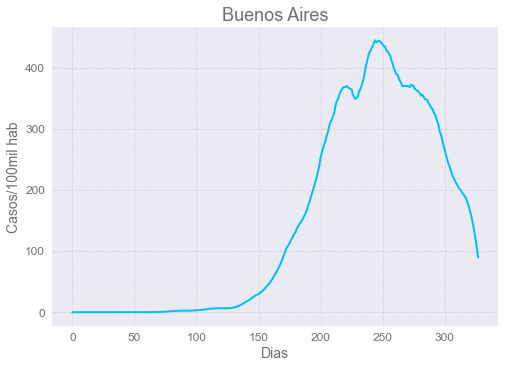

In [5]:
file_dir = 'Datos/RiesgoBuenosAires'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
data = data["incidenciaAcum14d"]
df = pd.DataFrame(data)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('Buenos Aires')
plt.plot(df)
df = df.to_numpy()
df1 = df[-20:-10]
df = df[:-20]
df_original = np.copy(df)
df = df.flatten()
scaler = MinMaxScaler(feature_range=(0, 1))

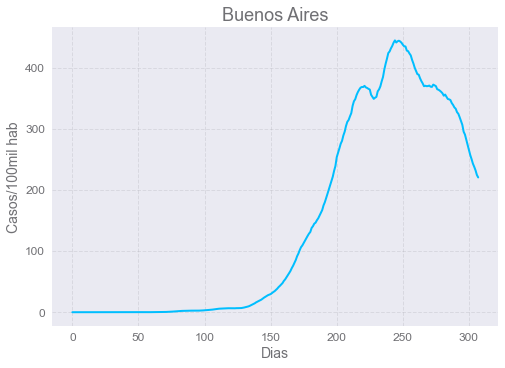

In [6]:
plt.plot(df)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('Buenos Aires')
plt.savefig('bsas_1.pdf')

In [7]:
total_size = df.shape[0]
train_size = int(0.8*total_size)
test_size = total_size - train_size
train_data = df[:-test_size]
test_data = df[-test_size:]

In [8]:
print('Data train size: ',train_size)
print('Data test size: ',test_size)

Data train size:  246
Data test size:  62


In [9]:
tw = 3
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
x_train, y_train = create_dataset(train_data_scaled, tw)
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))
x_test, y_test = create_dataset(test_data_scaled, tw)
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=16,activation='relu',input_shape=(1,tw)))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) 
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=16,verbose=2) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________
Train on 242 samples, validate on 58 samples
Epoch 1/500
 - 1s - loss: 0.1443 - mse: 0.1443 - val_loss: 0.6323 - val_mse: 0.6323
Epoch 2/500
 - 0s - loss: 0.1293 - mse: 0.1293 - val_loss: 0.5705 - val_mse: 0.5705
Epoch 3/500
 - 0s - loss: 0.1160 - mse: 0.1160 - val_loss: 0.5092 - val_mse: 0.5092
Epoch 4/500
 - 0s - loss: 0.1048 - mse: 0.1048 - val_loss: 0.4521 - val_mse: 0.4521
Epoch 5/500
 - 0s - loss: 0.0941 - mse: 0.0941 - val_loss: 0.4059 - val_mse: 0.4059
Epoch 6/500
 - 0s - loss: 0.0851 - mse: 0.0851 - 

Epoch 90/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 91/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 92/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 93/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 94/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 95/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 96/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 97/500
 - 0s - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 98/500
 - 0s - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 99/500
 - 0s - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 100/500
 - 0s - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 101/500
 - 0s - loss: 9.9971e-04 - mse: 9.9971e-04 - val_l

Epoch 179/500
 - 0s - loss: 1.5708e-04 - mse: 1.5708e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 180/500
 - 0s - loss: 1.4741e-04 - mse: 1.4741e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 181/500
 - 0s - loss: 1.4512e-04 - mse: 1.4512e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 182/500
 - 0s - loss: 1.3594e-04 - mse: 1.3594e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 183/500
 - 0s - loss: 1.3216e-04 - mse: 1.3216e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 184/500
 - 0s - loss: 1.2711e-04 - mse: 1.2711e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 185/500
 - 0s - loss: 1.2128e-04 - mse: 1.2128e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 186/500
 - 0s - loss: 1.2765e-04 - mse: 1.2765e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 187/500
 - 0s - loss: 1.1498e-04 - mse: 1.1498e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 188/500
 - 0s - loss: 1.0760e-04 - mse: 1.0760e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 189/500
 - 0s - loss: 1.0412e-04 - mse: 1.0412e-04 - v

Epoch 267/500
 - 0s - loss: 6.3509e-05 - mse: 6.3509e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 268/500
 - 0s - loss: 5.7897e-05 - mse: 5.7897e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 269/500
 - 0s - loss: 5.5618e-05 - mse: 5.5618e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 270/500
 - 0s - loss: 5.6461e-05 - mse: 5.6461e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 271/500
 - 0s - loss: 5.7818e-05 - mse: 5.7818e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 272/500
 - 0s - loss: 5.5982e-05 - mse: 5.5982e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 273/500
 - 0s - loss: 5.6203e-05 - mse: 5.6203e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 274/500
 - 0s - loss: 5.8581e-05 - mse: 5.8581e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 275/500
 - 0s - loss: 5.5901e-05 - mse: 5.5901e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 276/500
 - 0s - loss: 5.8937e-05 - mse: 5.8937e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 277/500
 - 0s - loss: 5.8135e-05 - mse: 5.8135e-05 - v

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
print('train mse squared:',mean_squared_error(y_train,train_predict))
print('test mse squared:',mean_squared_error(y_test,test_predict)) 

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(fontsize=12)
plt.savefig('bsas_2.pdf')

In [ ]:
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),label='train')
plt.plot(train_predict,label='train predict')
plt.legend(fontsize=12)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.savefig('bsas_3.pdf')

In [ ]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label='test')
plt.plot(test_predict,label='test predict')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=12)
plt.savefig('bsas_4.pdf')

In [ ]:
print('train mse squared:',mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))
print('test mse squared:',mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict)) 
print('train r2 score:',r2_score(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))
print('test r2 score:',r2_score(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict)) 
print('train mae:',mean_absolute_error(y_train,train_predict))
print('test mae:',mean_absolute_error(y_test,test_predict)) 

In [ ]:
print(x_train.shape)

In [ ]:
n = len(test_data_scaled)
lag = tw
x_input=test_data_scaled[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, lag))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, lag))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
lst_output = scaler.inverse_transform(lst_output)

In [ ]:
plt.plot(lst_output,'o',label='forecast')
plt.plot(df1,label='true data')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=12)
plt.savefig('bsas_5.pdf')

In [ ]:
graph_predictions(tw,df_original,train_predict,test_predict)